<a href="https://colab.research.google.com/github/Gru97/DeepLearningCourse/blob/main/dp_session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
x= np.random.rand(200,1)
e=np.random.rand(200,1)*.2
true_b=1
true_w=2
y=true_b+ true_w*x+e
y.shape


(200, 1)

In [48]:
import torch
x_tensor= torch.tensor(x)
y_tensor= torch.tensor(y)

In [49]:
print(x_tensor.device)
device='cuda' if torch.cuda.is_available else 'cpu'
print(device)
x_tensor = x_tensor.to(device)
x_tensor.device

y_tensor=y_tensor.to(device)

cpu
cuda


In [50]:
torch.manual_seed(42)
b= torch.randn(1, requires_grad=True, device= device)
w=torch.randn(1, requires_grad=True, device= device)
b,w

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

In [51]:
y_pred= b+w*x_tensor
error = y_pred-y_tensor
loss= 0.5*(error**2).mean()
loss.backward()
w.grad, b.grad

(tensor([-0.9698], device='cuda:0'), tensor([-1.7572], device='cuda:0'))

In [52]:
lr=0.5

with torch.no_grad():
  w -= lr * w.grad
  b -= b-lr * b.grad
w.grad.zero_()
b.grad.zero_()

tensor([0.], device='cuda:0')

In [53]:
loss.detach().cpu().item()


1.6985090193118424

In [54]:
!pip install torchviz
!pip install graphviz

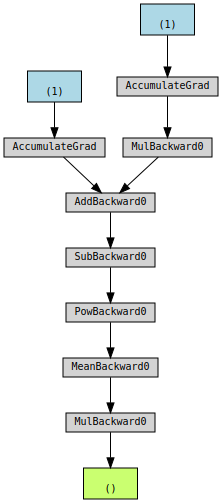

In [55]:
from torchviz import make_dot
make_dot(loss)

In [56]:
#with loop
torch.manual_seed(42)
b= torch.randn(1, requires_grad=True, device= device)
w=torch.randn(1, requires_grad=True, device= device)
b,w

losses=[]
epoch=50
for _ in range(epoch):
  y_pred= b + w* x_tensor
  error = y_pred - y_tensor
  loss = lr*(error**2).mean()
  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

  w.grad.zero_()
  b.grad.zero_()
  losses.append(loss.detach().cpu().item())

In [ ]:
losses

[1.8024155748701771,
 0.28711703346691053,
 0.0765539408424792,
 0.04537536783940643,
 0.038981604124619415,
 0.036126185106677804,
 0.03388200330398664,
 0.03183903510449979,
 0.029933528559321524,
 0.02814978298580841,
 0.026479124725516515,
 0.02491425390528107,
 0.0234484625085668,
 0.02207547031343358,
 0.020789403683732412,
 0.01958475879160179,
 0.018456384879817864,
 0.017399449233219004,
 0.01640942886929554,
 0.015482089129960687,
 0.014613460619448425,
 0.013799826950869006,
 0.01303770397222065,
 0.01232383195018933,
 0.011655156056562737,
 0.011028814473843112,
 0.01044212840838866,
 0.009892584335918515,
 0.00937783274516845,
 0.008895671475481853,
 0.008444037218733255,
 0.008020996979898607,
 0.007624739109305717,
 0.007253568827958765,
 0.006905895750538575,
 0.0065802370748842785,
 0.0062751964221935234,
 0.0059894680929182525,
 0.005721827801993293,
 0.005471132678538384,
 0.005236309211026186,
 0.00501635269783411,
 0.004810321851799423,
 0.0046173353492618705,
 0.0

In [ ]:
w, b

(tensor([1.7821], device='cuda:0', requires_grad=True),
 tensor([1.2158], device='cuda:0', requires_grad=True))

In [57]:
from torch import optim

torch.manual_seed(42)
b= torch.randn(1, requires_grad=True, device = device)
w= torch.randn(1, requires_grad=  True, device= device)
losses=[]
lr=0.5
optimizer = optim.SGD([b,w], lr=lr)

for _ in range(epoch):
  y_pred= b + w*x_tensor
  error= y_pred - y_tensor
  loss = 0.5*(error**2).mean()
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

losses, w, b

([1.6985090193118424,
  0.3007105164102581,
  0.08834615867324308,
  0.05359615004049804,
  0.04563457675202843,
  0.04187700335187555,
  0.03893008613386072,
  0.03627318650694855,
  0.03381647258319288,
  0.03153540079782281,
  0.029415990220457284,
  0.027446577710497203,
  0.02561650607387027,
  0.02391592146715842,
  0.02233565589623871,
  0.020867199043142336,
  0.01950263567362694,
  0.01823461938056908,
  0.017056315760766366,
  0.01596138370930839,
  0.0149439179081953,
  0.013998441607020809,
  0.013119861452905546,
  0.012303442508368607,
  0.011544784458829654,
  0.010839801314975502,
  0.010184700112452965,
  0.009575950072267083,
  0.00901026751211658,
  0.008484611412286264,
  0.007996143444416445,
  0.007542237684191039,
  0.007120447037371116,
  0.006728497965427588,
  0.0063642787634467625,
  0.006025830093762066,
  0.005711326662987872,
  0.005419075023550184,
  0.005147500860032555,
  0.004895142325354963,
  0.00466063785512582,
  0.004442726366329656,
  0.004240231

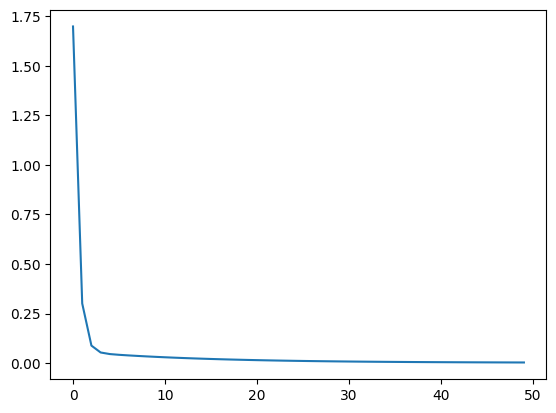

In [58]:
import matplotlib.pyplot as plt
plt.plot (range(epoch), losses)
plt.show()

In [61]:
import torch.nn as nn
loss_fn = nn.MSELoss()
loss = loss_fn(y_pred, y_tensor)
loss

tensor(0.0063, device='cuda:0', dtype=torch.float64,
       grad_fn=<MseLossBackward0>)

In [62]:
class ManualRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float64))
    self.w= nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float64))

  def forward(self, x):
    return self.b + self.w * x

In [63]:
torch.manual_seed(42)
model = ManualRegression()

list(model.parameters())
model.state_dict()

OrderedDict([('b', tensor([0.3367], dtype=torch.float64)),
             ('w', tensor([0.1288], dtype=torch.float64))])

In [64]:
from torch import optim

torch.manual_seed(42)

losses=[]
lr=0.5
optimizer = optim.SGD([b,w], lr=lr)
model = ManualRegression().to(device)
loss_fn= nn.MSELoss()
for _ in range(epoch):
  model.train()
  y_pred = model(x_tensor)
  loss= loss_fn(y_pred, y_tensor)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

losses, w, b

([2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997,
  2.93468523684997],

In [67]:
class ManualRegressionWithLayers(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(in_features=1, out_features=1, bias=True, dtype=torch.float64)

  def forward(self, x):
    return self.layer(x)

In [69]:
from torch import optim

torch.manual_seed(42)

losses=[]
lr=0.5
model = ManualRegressionWithLayers().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn= nn.MSELoss()
for _ in range(epoch):
  model.train()
  y_pred = model(x_tensor)
  loss= loss_fn(y_pred, y_tensor)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

losses, w, b

([11.589519037806333,
  0.7678616541482194,
  0.1897234331560608,
  0.13963351825878353,
  0.11943793628422827,
  0.10322266314216316,
  0.08932002401653981,
  0.07735166704793107,
  0.06704597803215681,
  0.0581718479133324,
  0.05053041289839368,
  0.043950440407050415,
  0.03828448394290511,
  0.0334055786432824,
  0.029204396182108454,
  0.025586794898998573,
  0.022471710237833478,
  0.019789338222008606,
  0.017479571260943332,
  0.015490651236817539,
  0.013778009689401818,
  0.012303269109411059,
  0.011033382960991264,
  0.009939895162643311,
  0.008998302432756658,
  0.008187505210954191,
  0.007489334851289537,
  0.006888146492465801,
  0.006370468481960192,
  0.005924700498219819,
  0.0055408536063383555,
  0.005210326422284517,
  0.004925712369887044,
  0.004680633711518907,
  0.004469598633378618,
  0.004287878182882358,
  0.004131400300534224,
  0.003996658571701342,
  0.003880633653569581,
  0.003780725616585894,
  0.0036946956842691214,
  0.003620616065873292,
  0.0035